# Qcodes example with Keysight N9030B

This notebook shows how to use Keysight N9030B instrument driver in Spectrum Analyzer and Phase Noise Modes for Swept SA and Log Plot measurements respectively.

Let's begin!

In [1]:
import os

from qcodes.dataset import (
    Measurement,
    initialise_or_create_database_at,
    load_or_create_experiment,
    plot_by_id,
    plot_dataset,
)
from qcodes.instrument_drivers.Keysight import KeysightN9030B

In [2]:
driver = KeysightN9030B("n9030b","driver_address")

Connected to: Keysight Technologies N9030B (serial:MY56320646, firmware:A.24.57) in 0.35s


In [3]:
driver.IDN()

{'vendor': 'Keysight Technologies',
 'model': 'N9030B',
 'serial': 'MY56320646',
 'firmware': 'A.24.57'}

## Spectrum Analyzer mode with Swept SA measurement

In [4]:
sa = driver.sa

In [5]:
sa.setup_swept_sa_sweep(start=200, stop= 10e3, npts=20001)

### With QCoDeS Measurement

Initialize database and begin experiment...

In [6]:
tutorial_db_path = os.path.join(os.getcwd(), 'tutorial.db')
initialise_or_create_database_at(tutorial_db_path)
load_or_create_experiment(experiment_name='tutorial_exp', sample_name="no sample")

Upgrading database; v0 -> v1: : 0it [00:00, ?it/s]
Upgrading database; v1 -> v2: 100%|█████████████████████████████████████████████████████| 1/1 [00:00<00:00, 334.71it/s]
Upgrading database; v2 -> v3: : 0it [00:00, ?it/s]
Upgrading database; v3 -> v4: : 0it [00:00, ?it/s]
Upgrading database; v4 -> v5: 100%|█████████████████████████████████████████████████████| 1/1 [00:00<00:00, 167.42it/s]
Upgrading database; v5 -> v6: : 0it [00:00, ?it/s]
Upgrading database; v8 -> v9: 100%|█████████████████████████████████████████████████████| 1/1 [00:00<00:00, 202.59it/s]


tutorial_exp#no sample#1@C:\Users\asic\Documents\tutorial.db
------------------------------------------------------------

In [7]:
meas1 = Measurement()
meas1.register_parameter(sa.trace)

In [8]:
with meas1.run() as datasaver:
    datasaver.add_result((sa.trace, sa.trace.get()))

dataset = datasaver.dataset

Starting experimental run with id: 1. 


#### Plot data

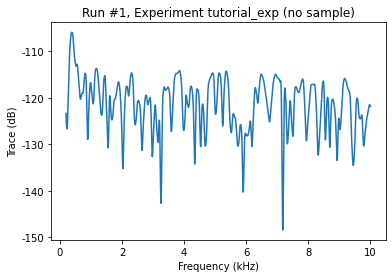

In [9]:
_ = plot_dataset(dataset)

## Phase Noise mode with Log Plot measurement

In [10]:
pn = driver.pn

In [11]:
pn.setup_log_plot_sweep(start_offset=10, stop_offset=200, npts=1001)

### With QCoDeS Measurement

In [12]:
meas2 = Measurement()
meas2.register_parameter(pn.trace)

In [13]:
with meas2.run() as datasaver:
    datasaver.add_result((pn.trace, pn.trace.get()))

run_id = datasaver.run_id

Starting experimental run with id: 2. 


[n9030b_pn(PhaseNoiseMode)] Carrier(s) Incorrect or Missing!


#### Plot data

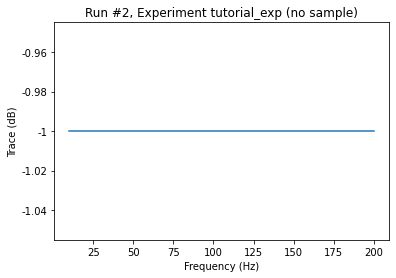

In [14]:
_ = plot_by_id(run_id)